# Code Notebook 2: EDA #

This notebook introduces the purpose of the project and includes initial data cleaning.  This involves indentifying all types of missing values in numeric features and ensuring that all features have appropriate data types.  Other possible problems, such as outliers, are addressed in later notebooks.  It is also more convenient to handle missing values in categorical data later, while numerically encoding such data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import graphtools as gt

In [2]:
train = pd.read_csv('../datasets/train_1.csv', keep_default_na=False, na_values='null')
test = pd.read_csv('../datasets/test_1.csv', keep_default_na=False, na_values='null')

## V. Numeric Data EDA ##

In [3]:
corr = train.corr()

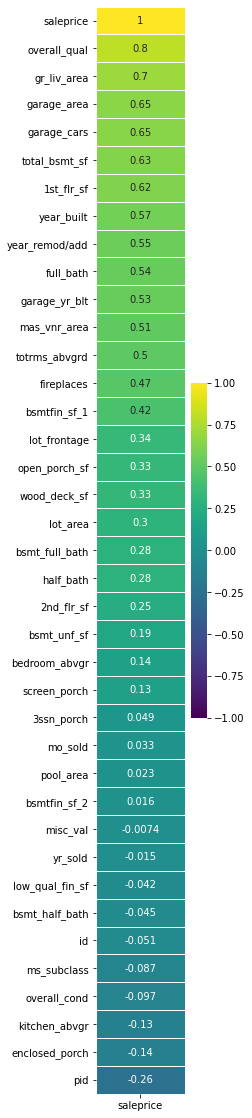

In [4]:
plt.figure(figsize=(2,20))
sns.heatmap(data=corr[['saleprice']].sort_values(by='saleprice', ascending=False), annot=True, vmin=-1, vmax=1, cmap='viridis', linewidths=1);

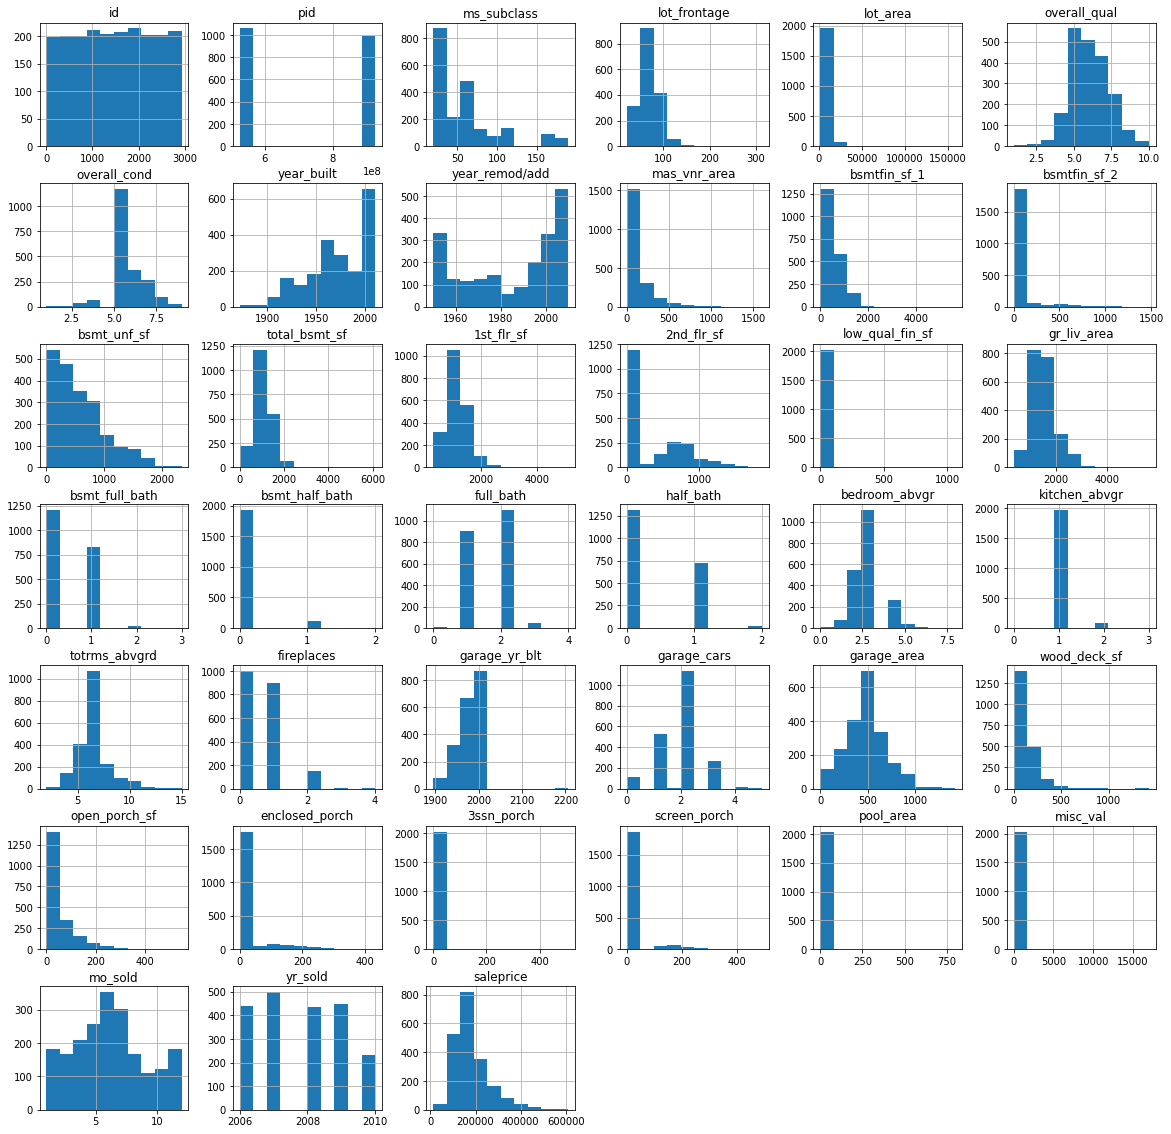

In [5]:
train.hist(figsize=(20,20));

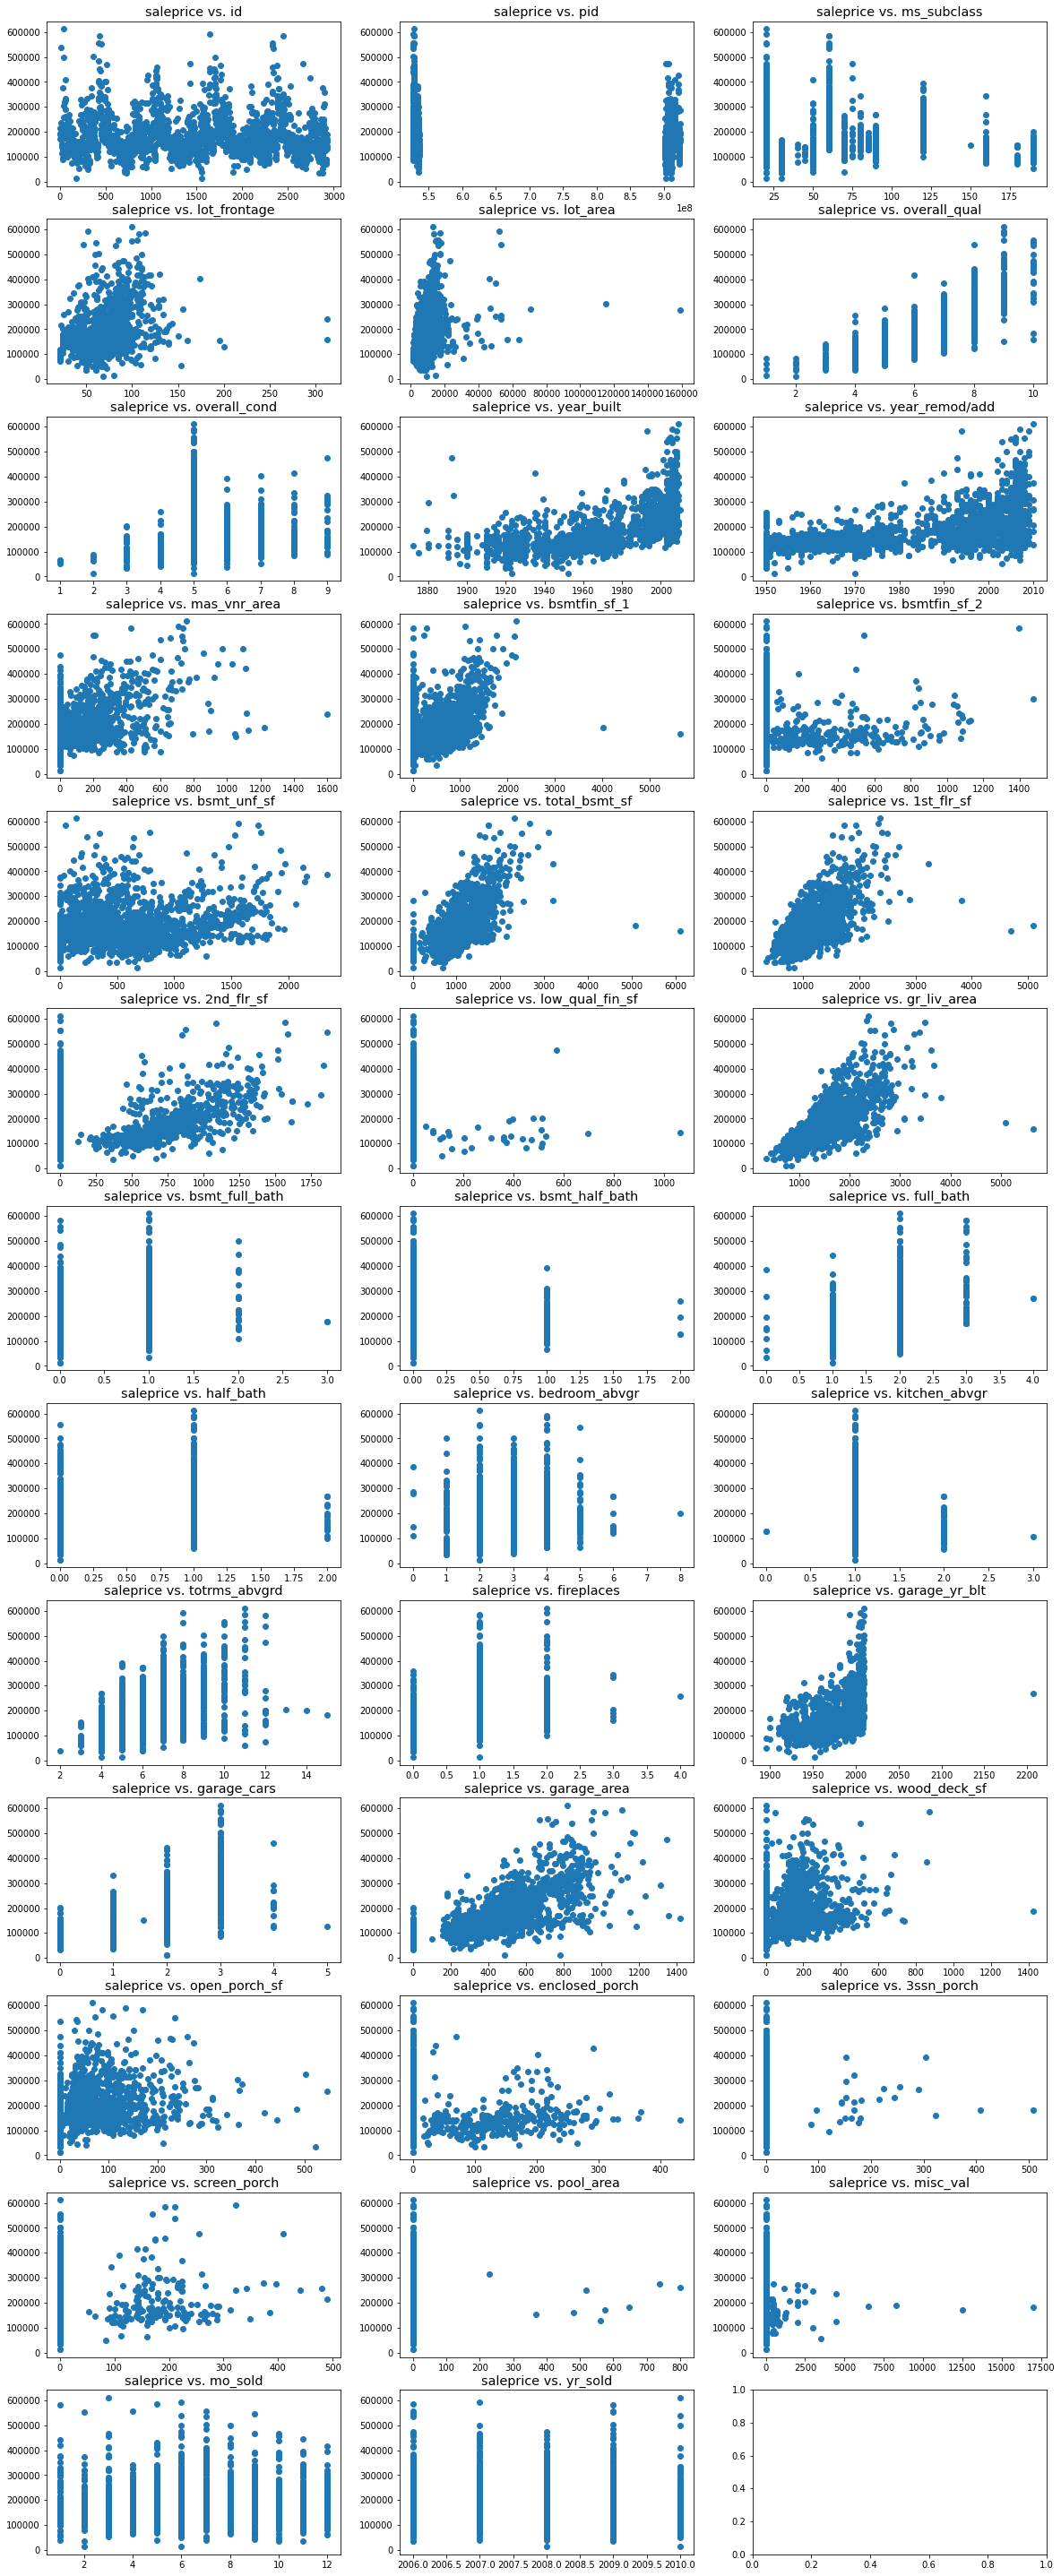

In [6]:
gt.multi_scatter(train, 'saleprice', 3, 20)

In [7]:
len(train['mas_vnr_area'][train['mas_vnr_area'] == 0]) / len(train['mas_vnr_area'])

0.5928815212091663

In [8]:
len(train['bsmtfin_sf_1'][train['bsmtfin_sf_1'] == 0]) / len(train['bsmtfin_sf_1'])

0.32081911262798635

In [9]:
len(train['bsmtfin_sf_2'][train['bsmtfin_sf_2'] == 0]) / len(train['bsmtfin_sf_2'])

0.8795709410043882

In [10]:
len(train['total_bsmt_sf'][train['total_bsmt_sf'] == 0]) / len(train['total_bsmt_sf'])

0.02681618722574354

In [11]:
len(train['2nd_flr_sf'][train['2nd_flr_sf'] == 0]) / len(train['2nd_flr_sf'])

0.5806923451974646

In [12]:
len(train['low_qual_fin_sf'][train['low_qual_fin_sf'] == 0]) / len(train['low_qual_fin_sf'])

0.9839102876645539

In [13]:
len(train['garage_area'][train['garage_area'] == 0]) / len(train['garage_area'])

0.05509507557289127

In [14]:
len(train['wood_deck_sf'][train['wood_deck_sf'] == 0]) / len(train['wood_deck_sf'])

0.5241345685031692

In [15]:
len(train['open_porch_sf'][train['open_porch_sf'] == 0]) / len(train['open_porch_sf'])

0.4446611409068747

In [16]:
len(train['3ssn_porch'][train['3ssn_porch'] == 0]) / len(train['3ssn_porch'])

0.9873232569478303

In [17]:
len(train['screen_porch'][train['screen_porch'] == 0]) / len(train['screen_porch'])

0.9117503656752803

In [18]:
len(train['pool_area'][train['pool_area'] == 0]) / len(train['pool_area'])

0.9956118966357874

In [19]:
len(train['misc_val'][train['misc_val'] == 0]) / len(train['misc_val'])

0.9683081423695759

Above, I have displayed three sets of graphs to help spot the most promising numeric features for regression.

The heatmap shows the correlation of each numeric feature with saleprice and will be useful for identifying features with strong predictive potential for regression.  The scatterplots give a more visual representation of the correlation between each feature and saleprice, including whether the relationship is linear.  Curvature in the scatterplot suggests that higher order terms may be needed.

The histograms and scatterplots show how each feature is distributed, including when a feature has a large number of very similar values (such as many 0's).  These plots are also excellent for identifying outliers.

Below the scatterplots, I calculated the portion of 0 values for the features that had a large number of them.

These are the characteristics I'd like to see in a numeric feature to choose it for regression:
- Heatmap and scatterplot show significant correlation with saleprice.
- Minimal outliers.
- Minimal 0 values.  Too many 0 values usually means the feature doesn't apply to many of the houses and won't help predict their prices.
- Minimal NaN values, or the NaN values can be reasonably interpreted and replaced with numbers.  Information about NaN values in the numerical data was examined in Part 1.
- Reasonable agreement with the assumptions of linear regression, particulary equality of variance and normal distribution of errors.  Linearity isn't much of a concern becuase I can include polynomial terms.

The following features meet these criteria well enough to merit further consideration in Part 3:

*Note: ID and PID aren't considered because they are simply identifiers.  PID may have some relation to house value depending on how the system works, but such a relationship is almost certainly indirect and captured by better features.  Also, ms_subclass is categorical despite being coded numerically.  It  will be considered below in the Categorical Variables EDA section.*
- lot_frontage - moderate correlation, con: has NaN values that can't be easily acconted for, some outliers
- lot_area - moderate correlation, con: some outliers
- overall_qual - strongest correlation
- year_built - fairly strong correlation, some curvature
- year_remod/add - correlation about the same as year_built, curvature
- mas_vnr_area - fairly strong correlation, some outliers, high portion of 0 values (59%)
- bsmtfin_sf1 - moderate correlation, some curvature (may make correlation appear smaller than it is), con: 0 values (32%) would be a problem for a feature inteaction, some outliers
- total_bsmt_sf - strong correlation, con: some zeros, some outliers
- 1st_flr_sf - strong correlation, con: some outliers, significant heterskedasticity
- gr_liv_area - very strong correlation, con: some outliers, significant heteroskedasticity
- garage-yr-blt - fairly strong correlation, NaN if there is no garage but could be coded as zero for feature interaction if other years are adjusted accordingly, curvature, con: one outlier that is definitely an error and must be removed
- garage_area - very strong correlation, the small number of zeros present align with the remaining data, outliers aren't extreme
- wood_deck_sf, open_porch_sf, enclosed_porch_sf, 3ssn_porch, screen_porch - these features individually have weak correlation and many 0 values, but could be interesting if engineered in combined features
- full_bath, half_bath, bsmt_full_bath, bsmt_half_bath - full_bath has a strong corrleation, half_bath and bsmt_full_bath moderate, and bsmt_half_bath essentially none.  Most likely best used in feature interactions with each other or other size-related features.
- totrms_abvgrd - strong correlation.  Likely best used in feature interaction with size.
- fireplaces - strong correlation
- garage_cars - strong correlation, should be compared with other garage size features

Once the good regression candidates are identified based on the above criteria, I will further examine them Part 3: Feature Selection and Engineering.  I will be looking for:
- Correlation with other features.  When features are strongly correlated, some of them will need to either be dropped or combined into a feature interaction.
- Features with curved scatterplots vs. saleprice may indicate that the regression should include higher order polynomial terms.

## VI. Categorical Data EDA ##

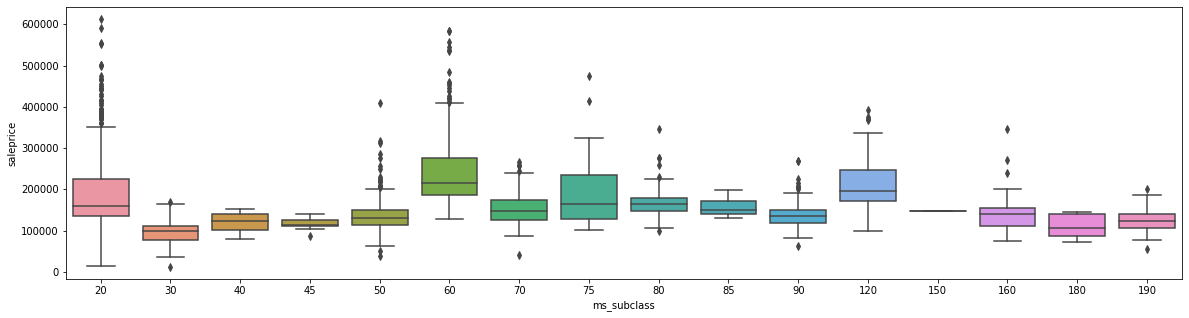

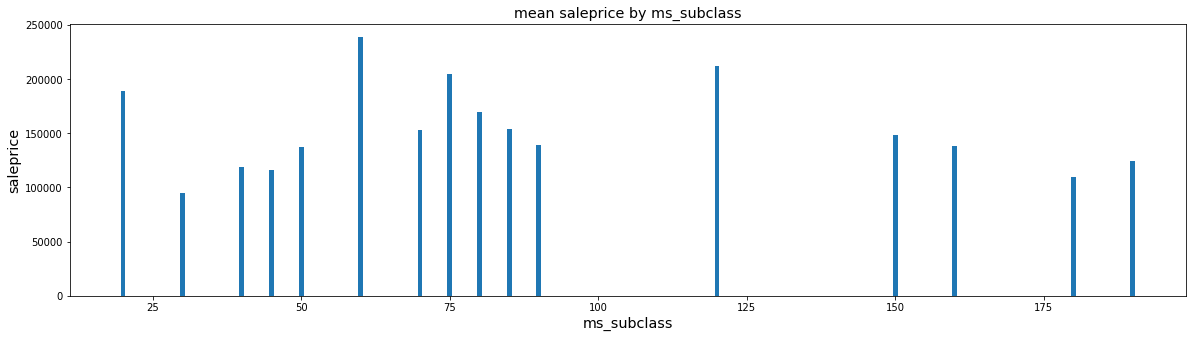

In [20]:
plt.figure(figsize=(20,5))
sns.boxplot(x='ms_subclass', y='saleprice', data=train)
gt.quick_bar(train['saleprice'], train['ms_subclass'])

Using ms_subclass as an example feature, I'm comparing box plots vs. a bar graph as a way of evaluating how impactful a feature is.  Box plots show more information, but bar charts are easier to interpret.  Since most categorical features will be encoded as binary, the effect of a linear regression will be very similar to taking an average of each category, which is what the bar above graph does.  The advantage of box plots could be that they give some visual sense of the strength of correlation between a given category and price, but the graphs are too complex to judge this accurately.  I find the bar charts to be more helpful due to their simplicity and similarity to what the the linear regression will actually calculate.

I'm now creating a list of categorical features.  This mostly means non-numeric features, but ms_subclass is actually a categorical feature coded numerically and will be added.  Saleprice also must be added because it is the target feature.

In [21]:
# Get a list of all features that are not numeric.
categorical_features = list(train.drop(columns=train._get_numeric_data().columns).columns)
# Add ms_subclass and saleprice to the list
categorical_features.append('ms_subclass')
categorical_features.append('saleprice')

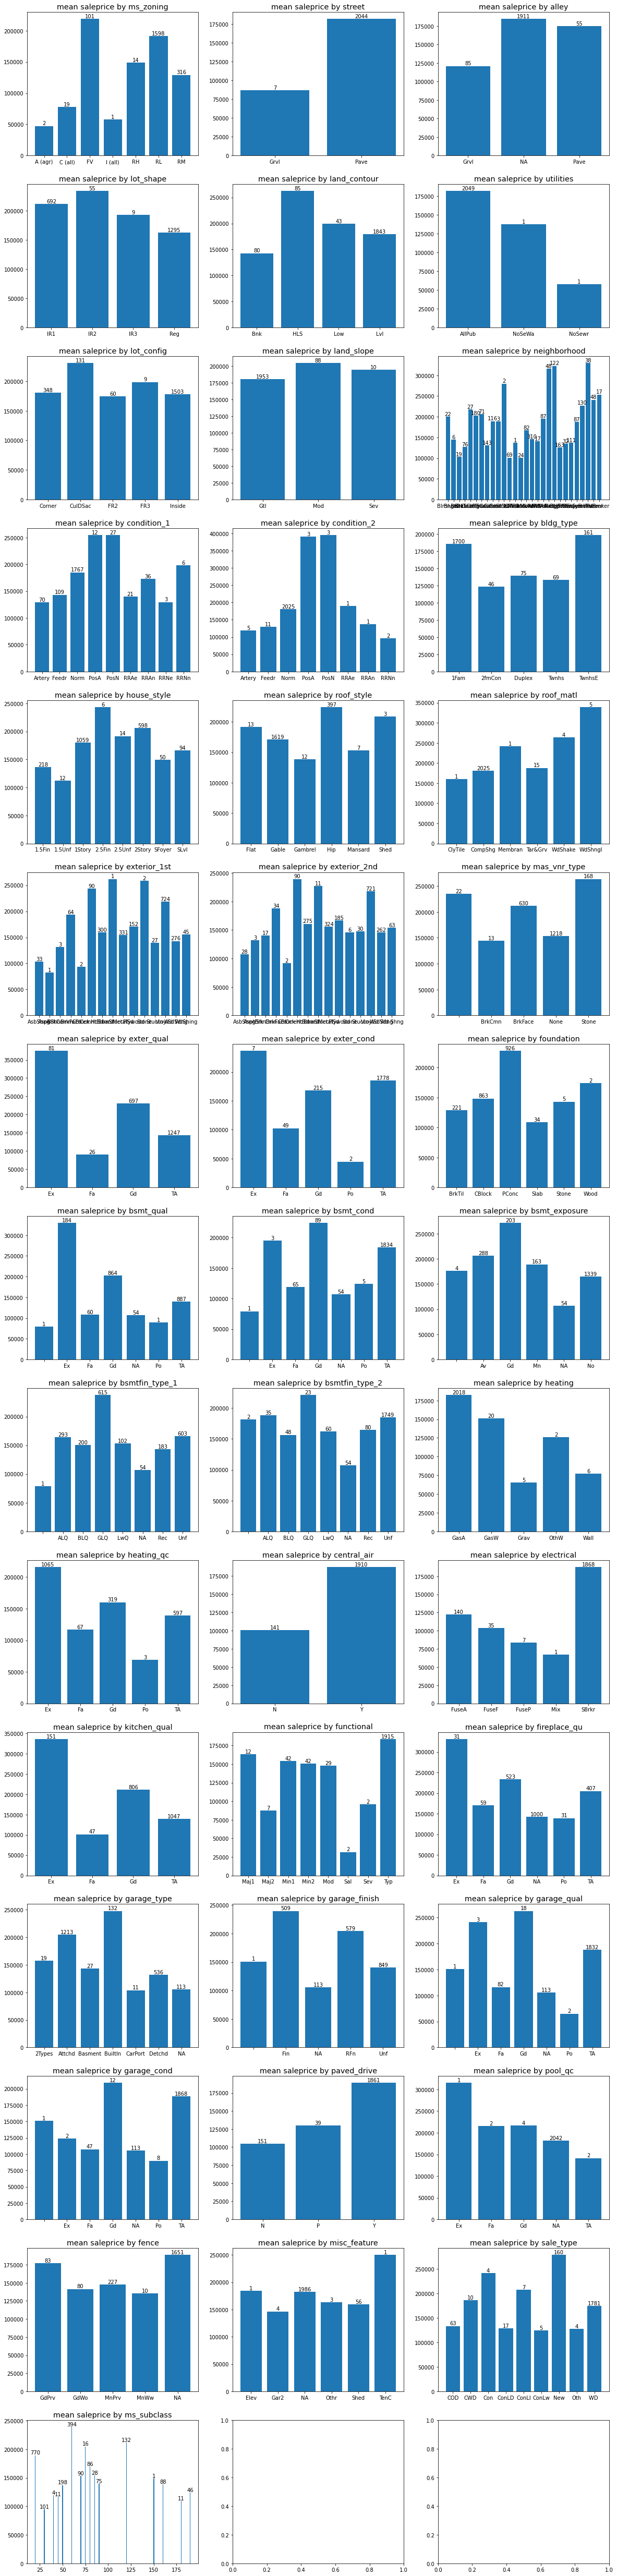

In [22]:
# Use custom function to display a bar graph for each categorical feature, with bar heigh representing mean saleprice for each category.
gt.multi_bar_target_mean(train[categorical_features], 'saleprice', 3, 20)

Each bar graph above shows the relationship between saleprice and one of the categorical features.  The heights of the bars show mean saleprice for each category, and the numbers on the bars show the number of sales in each category.

These are the characteristics I'd like to see in a categorical feature to choose it for regression:
- Saleprice differs significantly for different categories.
- A single category should not contain the vast majority of houses.

The following features meet these criteria well enough to merit further consideration in Part 3:
- ms_zoning
- lot_shape
- neighborhood
- roof_style
- exterior_1st
- exterior_2nd
- mas_vnr_type
- exter_qual
- foundation
- bsmt_qual
- bsmtfin_type_1
- bsmt_exposure
- bldg_type
- land_contour
- lot_config
- condition_1
- house_style
- paved_drive
- fence
- sale_type
- heating_qc
- kitchen_qual
- fireplace_qual
- garage_type
- garage_finish
- ms_subclass

Promising categorical features will be engineered to numerical features in Part 3 and checked for the following correlations with related features before being included in regression models.

## VII. Summary: EDA ##

The analysis here has given me a good idea of the most promising features for regression, as well as which features may benefit from feature interactions or removal of outliers.  Characteristics such as feature correlations and features that are best modeled with higher order polynomial terms will be examined further during feature selection and engineering.

Several features show strong and clear correlations with saleprice, strongly suggesting that they will be useful in predicting sale prices.  The heatmap already provides some suggestion of which features are strongly correlated with price and will therefore be useful for making recommenations on how to increase home value.  It will be instructive to see how this compares with the fetures that will be most useful to the regression model in predicting sale prices.